# データ解析特論 2022年度水曜２限

# 第7回 その2 Lasso 正則化

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets

## Lasso 正則化とは

前回用いた正則化手法は Ridge 正則化もしくは $L^2$ 正則化と呼ばれる手法であった．その名の由来は正則化項（罰則項）に回帰係数の $L^2$ ノルムの2乗（回帰係数の2乗和）を用いていたからであった．

これに対して，正則化項に回帰係数の $L^1$ ノルム（回帰係数の絶対値の和）を用いる手法を Lasso 正則化もしくは $L^1$ 正則化とよぶ．

つまり，$L^1$ 正則化とは，ハイパーパラメータ $\alpha>0$ に対して

$$
\tilde E(a_0, a_1, \ldots, a_N; \eta) := \frac1N \sum_{i=1}^N (e^{(i)})^2 + \eta \sum_{j=0}^M (a_j)^2
= \frac1N \sum_{i=1}^N \left( y^{(i)} - a_0 - \sum_{j=1}^M a_j x_j^{(i)} \right)^2 + \alpha \sum_{j=0}^M |a_j|
\qquad ...(*)
$$

をコスト関数とする手法である．これを最小にする $a_0, a_1, \ldots, a_M$ を回帰係数として採用する．

Ridge と Lasso との典型的な差は

- Ridge では回帰係数全体が小さくなる傾向がある
- Lasso では回帰係数が $0$ となる個数が増える

ということである．そのため，Lasso は回帰に用いる変数の選択に用いることができる．Lasso で非零となる回帰変数を選択するということ．

Text(0.5, 1.0, 'Lasso')

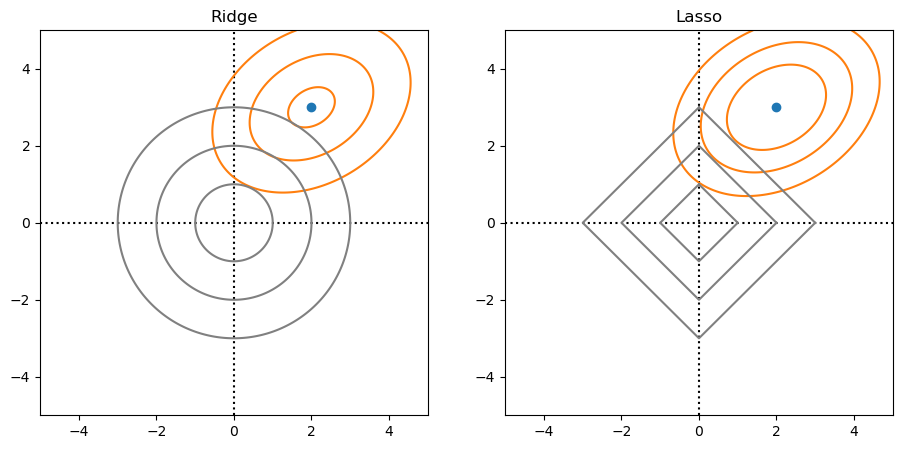

In [3]:
# contour用のメッシュ
xmesh = np.arange(-5, 5.01, 0.01)
ymesh = np.arange(-5, 5.01, 0.01)
xmesh, ymesh = np.meshgrid(xmesh, ymesh)

# 非正則化最適解の位置
x0 = 2.0
y0 = 3.0

# 誤差関数
E = 1.5*(xmesh-2)**2 + 2*(ymesh-3)**2 - (xmesh-2)*(ymesh-3)

# Ridge
R = xmesh**2 + ymesh**2

# Lasso
L = np.abs(xmesh) + np.abs(ymesh)

# 可視化
fig, ax = plt.subplots(ncols=2, figsize=(11, 5))
ax[0].plot([-5, 5], [0, 0], 'k:', zorder=0)
ax[0].plot([0, 0], [-5, 5], 'k:', zorder=0)
ax[0].scatter(x0, y0)
ax[0].contour(xmesh, ymesh, E, levels=[0.5, 3.5, 9], colors='tab:orange')
ax[0].contour(xmesh, ymesh, R, levels=[1, 4, 9], colors='gray')
ax[0].set_title('Ridge')
ax[1].plot([-5, 5], [0, 0], 'k:', zorder=0)
ax[1].plot([0, 0], [-5, 5], 'k:', zorder=0)
ax[1].scatter(x0, y0)
ax[1].contour(xmesh, ymesh, E, levels=[2.25, 5.25, 9.75], colors='tab:orange')
ax[1].contour(xmesh, ymesh, L, levels=[1, 2, 3], colors='gray')
ax[1].set_title('Lasso')

## diabetes dataset で Lasso 回帰

In [8]:
# 糖尿病データセット読み込み
diabets = datasets.load_diabetes()

for i in diabets:
    print(i)
# データの特徴量
print(diabets.feature_names)

data
target
frame
DESCR
feature_names
data_filename
target_filename
data_module
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


- age: 年齢
- sex: 性別
- bmi: BMI = 体重kg / (身長m)^2
- bp: 平均血圧
- s1: 血清測定値1 (tc)
- s2: 血清測定値2 (ldl)
- s3: 血清測定値3 (hdl)
- s4: 血清測定値4 (tch)
- s5: 血清測定値5 (ltg)
- s6: 血清測定値6 (glu)

目的変数 $y$ は1年後の疾患の進行状況

In [9]:
#　データセット読み込み
X = diabets.data
Y = diabets.target
X.shape, Y.shape

((442, 10), (442,))

In [10]:
# 学習データとテストデータに分割
Xtrain = X[:300]
Ytrain = Y[:300]
Xtest  = X[300:]
Ytest  = Y[300:]

In [13]:
# 正則化しない線形重回帰
reg = LinearRegression()
YtrainPred = reg.fit(Xtrain, Ytrain).predict(Xtrain)
YtestPred = reg.predict(Xtest)

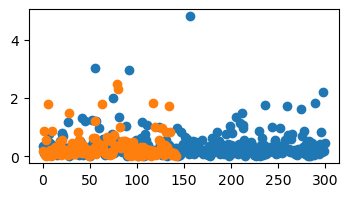

In [19]:
# Ytest の比較
#fig, ax = plt.subplots(figsize=(4, 2))
#ax.plot(Ytrain, 'o')
#ax.plot(YtrainPred, 'o')
#plt.show()

fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(np.abs(Ytrain-YtrainPred)/Ytrain, 'o')
ax.plot(np.abs(Ytest-YtestPred)/Ytest, 'o')

In [22]:
# MSE を計算
MSEtrain = np.mean((Ytrain-YtrainPred)**2)
MSEtest = np.mean((Ytest-YtestPred)**2)
MSEtrain, MSEtest

(2923.0002005013744, 2794.5690145007325)

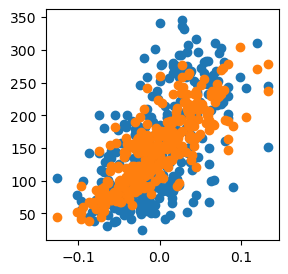

In [32]:
# (X, Y) の散布図
j = 8
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(Xtrain[:, j], Ytrain)
ax.scatter(Xtrain[:, j], YtrainPred)

In [ ]:
# 学習データの3次元描画




In [ ]:
# テストデータの3次元描画




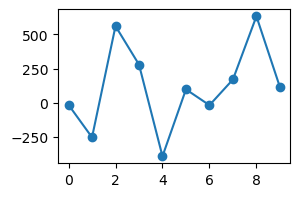

In [35]:
# 回帰係数の様子
fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(reg.coef_, 'o-')



## Lasso で回帰

In [41]:
# Lasso で回帰する
alpha = 1.1
regL = Lasso(alpha=alpha)
YtrainPredL = regL.fit(Xtrain, Ytrain).predict(Xtrain)
YtestPredL = regL.predict(Xtest)


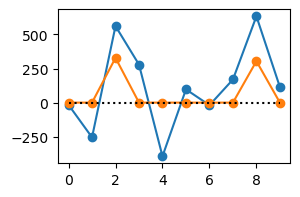

In [42]:
# 回帰係数の比較
fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(reg.coef_, 'o-')
ax.plot(regL.coef_, 'o-')
ax.plot([0, 9], [0, 0], 'k:')



In [ ]:
# 正則化パラメータを変えたときの回帰係数の変化の様子




In [ ]:
# 回帰係数の変化の様子の描画




In [ ]:
# 消えていない回帰係数の個数



## 演習 07-2

Iris データセットや Diabets データセットに対して，Lasso 正則化による変数選択の様子を観察し，正則化パラメータ `alpha` を変えたときの汎化誤差を調べよ．その結果から `alpha`, 選択される変数，汎化誤差に関する考察を与えよ．

もし余力があれば，乱数を回帰変数に用いた `ADCA2022_05-1_IrisLinearRegression_spurious.ipynb` の notebook と同様にいい加減な回帰変数を用いた場合も考えよう．Ridge 回帰と Lasso 回帰で正則化する時，`alpha` を変えたときに回帰変数の値や非零の回帰変数の数はどのようにふるまうか．

<h3><div style="text-align: right;">以上</div></h3>